<a href="https://colab.research.google.com/github/amrahmani/ML/blob/main/Ch8_Backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem 1:** For **a binary classification**, create a multi-layer NN with one hidden layer containing three neurons, two inputs, and one output. The output should have a sigmoid activation function. Suppose we want to train it with the following dataset: [(x = (1, 1), y = 0), (x = (1, 2), y = 1), (x = (1, 3), y = 1), (x = (3, 2), y = 0), (x = (3, 1), y = 0), (x = (2, 2), y = 0), (x = (3, 4), y = 1), (x = (3, 4), y = 0)]



Input: (1, 1), Predicted Output: 0.1072, Predicted Class: 0
Input: (1, 2), Predicted Output: 0.8299, Predicted Class: 1
Input: (1, 3), Predicted Output: 0.9339, Predicted Class: 1
Input: (3, 2), Predicted Output: 0.0191, Predicted Class: 0
Input: (3, 1), Predicted Output: 0.0115, Predicted Class: 0
Input: (4, 2), Predicted Output: 0.0134, Predicted Class: 0
Input: (5, 3), Predicted Output: 0.0142, Predicted Class: 0
Input: (3, 5), Predicted Output: 0.9411, Predicted Class: 1


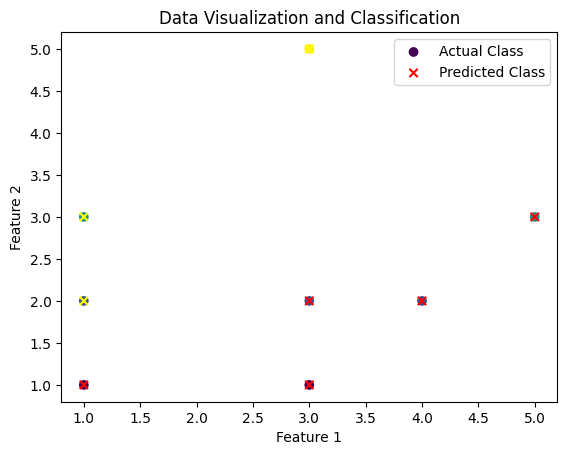

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Define the multi-layer perceptron model
class MLNN(nn.Module):
    def __init__(self):
        super(MLNN, self).__init__()
        self.hidden = nn.Linear(2, 3) # Define the hidden layer with 3 neurons and input size 2
        self.output = nn.Linear(3, 1) # Define the output layer with 1 neuron
    def forward(self, x):
        x = torch.sigmoid(self.hidden(x)) # Apply sigmoid activation function to the hidden layer output
        x = torch.sigmoid(self.output(x)) # Apply sigmoid activation function to the output layer
        return x

# Define input-output pairs for training
dataset = [((1, 1), 0), ((1, 2), 1), ((1, 3), 1), ((3, 2), 0),
           ((3, 1), 0), ((2, 2), 0), ((3, 4), 1), ((4, 3), 0)]

# Convert data into torch tensors
inputs = torch.tensor([data[0] for data in dataset], dtype=torch.float32)
# Targets are binary labels, convert them to tensor and reshape to [batch_size, 1]
targets = torch.tensor([data[1] for data in dataset], dtype=torch.float32).view(-1, 1)

model = MLNN() # Create an instance of MLNN model

criterion = nn.BCELoss() # Define the loss function (Binary Cross Entropy Loss for binary classification)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1) # Define the optimizer (Stochastic Gradient Descent)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # 1- Forward pass
    outputs = model(inputs)

    # 2- Compute the loss between predicted outputs and targets
    loss = criterion(outputs, targets)

    # Zero the gradients to prevent accumulation
    optimizer.zero_grad()

    # 3- Backward pass and optimization
    loss.backward()

    # 4- Update model parameters using optimizer
    optimizer.step()

# Test the trained model with some sample data
test_data = [(1, 1), (1, 2), (1, 3), (3, 2), (3, 1), (4, 2), (5, 3), (3, 5)]
predicted_classes = []
for input_data in test_data:
    input_tensor = torch.tensor(input_data, dtype=torch.float32)    # Convert input data to tensor
    prediction = model(input_tensor).item()    # Get model prediction for the input
    # Apply threshold
    if prediction > 0.5:
        predicted_class = 1
    else:
        predicted_class = 0
    predicted_classes.append(predicted_class)
    print(f'Input: {input_data}, Predicted Output: {prediction:.4f}, Predicted Class: {predicted_class}')

# Visualize the data and predictions
import matplotlib.pyplot as plt

# Extract input data and predicted classes
x_data = [data[0] for data in test_data]
y_data = [data[1] for data in test_data]

# Plot the actual data points
plt.scatter(x_data, y_data, c=y_data, cmap='viridis', label='Actual Class')

# Plot the predicted data points
plt.scatter(x_data, y_data, c=predicted_classes, cmap='autumn', label='Predicted Class', marker='x')

# Add labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Data Visualization and Classification')
plt.legend()

# Show the plot
plt.show()

**Problem 2:** Predicting whether a student will pass (1) or fail (0) based on study hours, previous passes.

Dataset = 'https://github.com/amrahmani/ML/blob/main/student_data.csv'

Objective: Fit a **Neural Network** classifier to the data to predict the probability of passing for a new student.

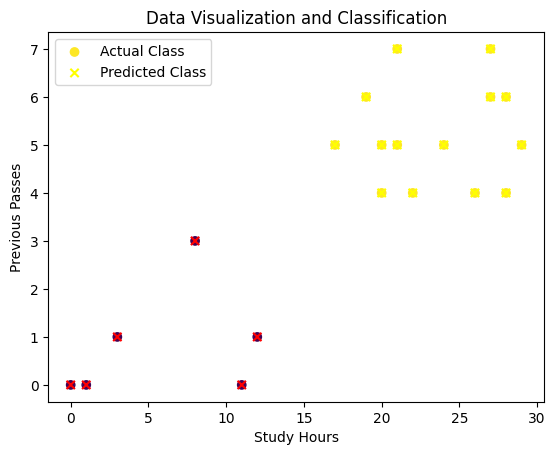

Confusion Matrix:
 [[ 6  0]
 [ 0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00        14

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Define the multi-layer perceptron model
class MLNN(nn.Module):
    def __init__(self):
        super(MLNN, self).__init__()
        self.hidden = nn.Linear(2, 3)  # Define the hidden layer with 3 neurons and input size 2
        self.output = nn.Linear(3, 1)  # Define the output layer with 1 neuron
    def forward(self, x):
        x = torch.sigmoid(self.hidden(x))  # Apply sigmoid activation function to the hidden layer output
        x = torch.sigmoid(self.output(x))  # Apply sigmoid activation function to the output layer
        return x

# Load the dataset
url = 'https://raw.githubusercontent.com/amrahmani/ML/main/student_data.csv'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(url)

# Split data into training and testing sets (80/20 split)
X = df[['Study Hours', 'Previous Passes']]
y = df['Pass/Fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Set random state for reproducibility

# Convert data into torch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)

X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

model = MLNN()  # Create an instance of MLNN model

criterion = nn.BCELoss()  # Define the loss function (Binary Cross Entropy Loss for binary classification)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # Define the optimizer (Stochastic Gradient Descent)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # 1- Forward pass
    outputs = model(X_train_tensor)

    # 2- Compute the loss between predicted outputs and targets
    loss = criterion(outputs, y_train_tensor)

    # Zero the gradients to prevent accumulation
    optimizer.zero_grad()

    # 3- Backward pass and optimization
    loss.backward()

    # 4- Update model parameters using optimizer
    optimizer.step()

# Test the trained model with test data
with torch.no_grad():  # Disable gradient calculation for testing
    y_pred = model(X_test_tensor)
    y_pred_class = (y_pred > 0.5).float()  # Convert predictions to class labels (threshold 0.5)

# Visualize the data and predictions
import matplotlib.pyplot as plt

# Extract input data and predicted classes
x_test_data = X_test.values
y_test_data = y_test.values

# Plot the actual data points
plt.scatter(x_test_data[:, 0], x_test_data[:, 1], c=y_test_data, cmap='viridis', label='Actual Class')

# Plot the predicted data points
plt.scatter(x_test_data[:, 0], x_test_data[:, 1], c=y_pred_class, cmap='autumn', label='Predicted Class', marker='x')

# Add labels and legend
plt.xlabel('Study Hours')
plt.ylabel('Previous Passes')
plt.title('Data Visualization and Classification')
plt.legend()

# Show the plot
plt.show()

# Calculate classification metrics
cm = confusion_matrix(y_test, y_pred_class.round())
print("Confusion Matrix:\n", cm)
print(classification_report(y_test, y_pred_class.round()))

**Practice:**

**Task 1:** In Problem 1, change the dataset and activation function to learn neural network addition of two numbers.

**Task 2:** Based on Problem 1, create a neural network with two hidden layers. The output should be the multiplication of two positive inputs.

**Task 3:** In Problem 2, try different **loss functions**, such as Cross Entropy Loss (`nn.CrossEntropyLoss()`), Poisson NLL Loss (`nn.PoissonNLLLoss()`) and Mean Squared Error (`nn.MSELoss()`), to optimize the neural network's performance.

**Task 4:** In Problem 2, try different **optimizers**, such as Stochastic Gradient Descent (SGD): `torch.optim.SGD`, Stochastic Gradient Descent with Momentum (SGD with Momentum): `torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8))`, Adaptive Moment Estimation: `torch.optim.Adam`, Adagrad: `torch.optim.Adagrad`, and ... to optimize the neural network's performance.

**Task 5:** In Problem 2, use **Weight Decay (L2 Regularization)** to prevent overfitting. `optimizer = torch.optim.SGD(model.parameters(), lr=0.01, weight_decay=1e-5)`
